In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
#definind the start and end time

start = '2010-01-01'
end = '2022-03-31'
df = data.DataReader('AAPL','yahoo',start,end) #stock ticker entered
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444379
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-25,175.279999,172.750000,173.880005,174.720001,80546200.0,174.720001
2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007
2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.770004
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001


In [4]:
#reseting the index

df = df.reset_index()
df.head()   #we don't want the date so we can just remove them

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444379
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
#no need of date column and adj. close column so just drop them
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [6]:
#our based on close column we can amke an app for open 
#low high volmune uo to us

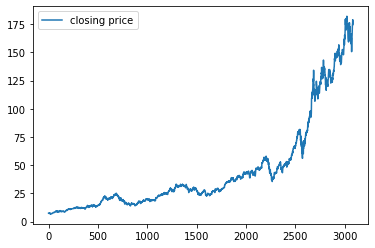

In [7]:
#workin on the close column
plt.plot(df.Close,label = 'closing price')
plt.legend()                                 #graph showing the closing price of AAPL stack

In [8]:
#how can we create the moving avergaes

#suppos we want 100 days moving avergae
# then for the 100 days moving average it will calculate the mean of 100 days 
# moving avergae for the 101th index

In [9]:
#for thet we need to create a rollijg function

ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3079    166.277701
3080    166.533501
3081    166.808201
3082    167.076301
3083    167.309601
Name: Close, Length: 3084, dtype: float64

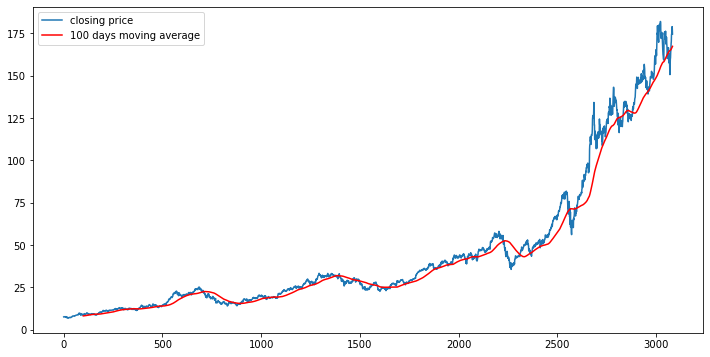

In [10]:
#plot moving average in the function
plt.figure(figsize = (12,6))
plt.plot(df.Close,label = 'closing price')
plt.plot(ma100,'r',label = '100 days moving average')
plt.legend()
#below graph with 100 days rolling average

In [11]:
#for 200 days moving avegare
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3079    155.55140
3080    155.79265
3081    156.03505
3082    156.27570
3083    156.49800
Name: Close, Length: 3084, dtype: float64

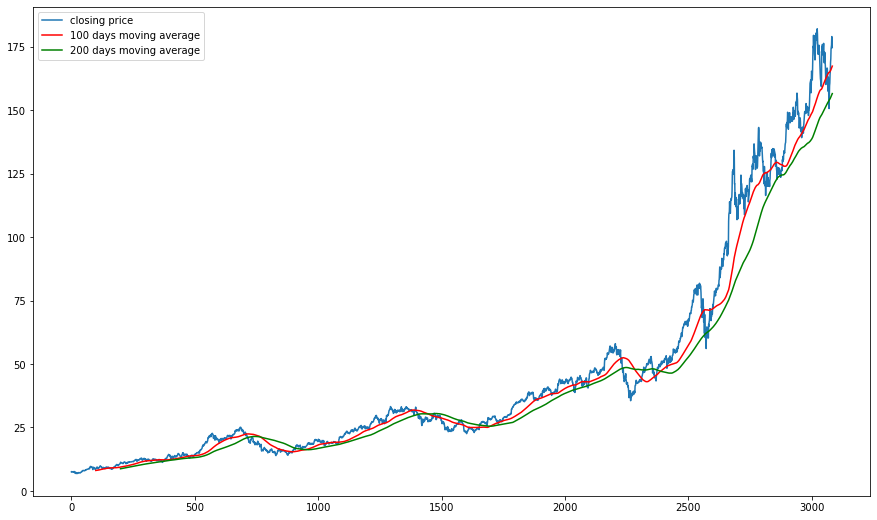

In [12]:
#plot moving average in the function
plt.figure(figsize = (15,9))
plt.plot(df.Close,label = 'closing price')
plt.plot(ma100,'r',label = '100 days moving average')
plt.plot(ma200,'g',label = '200 days moving average')
plt.legend()

#below graph with 200 days rolling average

In [13]:
df.shape #how many rows and colums that we have

(3084, 5)

In [14]:
#splitting data into trainning and testing

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  
#we will use 70% of total data-set as training


#for datatesting

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#rest 30% data will be test_data

print("Trainning Data-Shape: ",data_training.shape)
print("Testing Data-Shape: ",data_testing.shape)

Trainning Data-Shape:  (2158, 1)
Testing Data-Shape:  (926, 1)


In [16]:
#data trainning obersevation

data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
#data testing obersevation
data_testing.head()

,Close
2158,47.477501
2159,47.572498
2160,50.375000
2161,51.847500
2162,51.997501


In [18]:
#now we need to scale our data

#for stat LSTM we need to scale down oue data betwn 0-1 for taht we need 
#to import min-max scalar form sklearn data pre-processing

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaler

MinMaxScaler()

In [20]:
#now we can fit our data in minmax scalar

#fititng the training data in minmax scaler

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01594276],
       [0.01874214],
       [0.01905793],
       ...,
       [1.        ],
       [0.99635569],
       [0.97705871]])

In [21]:
#divide uthe data in xtrain and ytrain

In [22]:
x_train = []
y_train = []

data_training_array.shape

(2158, 1)

In [23]:
#insert values in xtrain and ytrain

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
    
x_train

[array([[1.59427605e-02],
        [1.87421428e-02],
        [1.90579332e-02],
        [1.61476089e-02],
        [1.58147374e-02],
        [1.70095972e-02],
        [1.54136324e-02],
        [1.33738199e-02],
        [1.58744815e-02],
        [1.48332608e-02],
        [1.18461227e-02],
        [1.96212122e-02],
        [1.67962481e-02],
        [1.36725291e-02],
        [4.86475384e-03],
        [9.40520519e-03],
        [1.18546576e-02],
        [1.35103893e-02],
        [6.17909052e-03],
        [8.52348074e-06],
        [2.28727833e-03],
        [3.25169651e-03],
        [6.12788127e-03],
        [0.00000000e+00],
        [2.91030148e-03],
        [1.76666231e-03],
        [3.53334741e-03],
        [2.62012709e-03],
        [5.64993962e-03],
        [7.10938059e-03],
        [9.68685609e-03],
        [8.96141444e-03],
        [9.28571693e-03],
        [8.21034537e-03],
        [7.14350869e-03],
        [4.27585881e-03],
        [7.34835711e-03],
        [8.49199627e-03],
        [1.0

In [24]:
y_train

[0.0444315262813495,
 0.05231756916710609,
 0.055330323336760384,
 0.058701519498459226,
 0.06136435515680555,
 0.06065597186339752,
 0.05454513755650153,
 0.050260721083051796,
 0.048886640270084936,
 0.04365486398182719,
 0.049893732820215225,
 0.0524541499693901,
 0.05311130121815694,
 0.057728566451386104,
 0.06418079578885355,
 0.06812381723173183,
 0.0700014215297084,
 0.06667291114185869,
 0.06981367705294955,
 0.0673556784129461,
 0.0656743648625204,
 0.0637113662267901,
 0.0650769235590204,
 0.054724358552523805,
 0.05076426735811693,
 0.048161187225148366,
 0.046846861937559214,
 0.04828922175664038,
 0.05685800912342895,
 0.05636300911915579,
 0.05766883371606382,
 0.055680241848068385,
 0.05099469760872494,
 0.05178840686972036,
 0.05069598835200265,
 0.049373116793621497,
 0.04568611883361634,
 0.05107150009557579,
 0.053077161715099797,
 0.057156741170206665,
 0.05794192695046552,
 0.057378647940078104,
 0.06147529714671354,
 0.058812461488367246,
 0.05638007887068436,
 0

In [25]:
#convert xtrain in numpy array so that we can provide our data to LSTM

x_train , y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train

array([[[0.01594276],
        [0.01874214],
        [0.01905793],
        ...,
        [0.04290384],
        [0.04669321],
        [0.04537889]],

       [[0.01874214],
        [0.01905793],
        [0.01614761],
        ...,
        [0.04669321],
        [0.04537889],
        [0.04443153]],

       [[0.01905793],
        [0.01614761],
        [0.01581474],
        ...,
        [0.04537889],
        [0.04443153],
        [0.05231757]],

       ...,

       [[0.88881871],
        [0.89246303],
        [0.89156683],
        ...,
        [0.97980692],
        [0.98082253],
        [0.98912677]],

       [[0.89246303],
        [0.89156683],
        [0.88176902],
        ...,
        [0.98082253],
        [0.98912677],
        [1.        ]],

       [[0.89156683],
        [0.88176902],
        [0.89317991],
        ...,
        [0.98912677],
        [1.        ],
        [0.99635569]]])

In [27]:
y_train

array([0.04443153, 0.05231757, 0.05533032, ..., 1.        , 0.99635569,
       0.97705871])

In [28]:
x_train.shape

(2058, 100, 1)

In [29]:
#creating the ML model

In [30]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [31]:
#creating the sequeential model

In [32]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))

#add dropout
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.3))

#3rd layer
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.4))

#for 4th layer
model.add(LSTM(units = 120,activation = 'relu'))

#add dropout
model.add(Dropout(0.5))

#for the last layer we have dense layer that connects all the layer
model.add(Dense(units = 1))  #only one units as we need to predict only one value i.e. closing price

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
#now can simply compile our model for compilation we will use adam optimiser
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #other losses are like binary-cross-entropy and ctegorical corss entropy used for claasification
#for time series prediction we can use mean_squared_error
history = model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
65/65 [==============================] - 20s 226ms/step - loss: 0.0367
Epoch 2/100
65/65 [==============================] - 15s 233ms/step - loss: 0.0081
Epoch 3/100
65/65 [==============================] - 15s 235ms/step - loss: 0.0068
Epoch 4/100
65/65 [==============================] - 12s 188ms/step - loss: 0.0066
Epoch 5/100
65/65 [==============================] - 12s 177ms/step - loss: 0.0057
Epoch 6/100
65/65 [==============================] - 11s 176ms/step - loss: 0.0061
Epoch 7/100
65/65 [==============================] - 15s 230ms/step - loss: 0.0061
Epoch 8/100
65/65 [==============================] - 13s 204ms/step - loss: 0.0050
Epoch 9/100
65/65 [==============================] - 13s 193ms/step - loss: 0.0048
Epoch 10/100
65/65 [==============================] - 13s 202ms/step - loss: 0.0041
Epoch 11/100
65/65 [==============================] - 13s 196ms/step - loss: 0.0043
Epoch 12/100
65/65 [==============================] - 13s 200ms/step - loss: 0.0042
E

65/65 [==============================] - 12s 178ms/step - loss: 0.0018
Epoch 99/100
65/65 [==============================] - 12s 187ms/step - loss: 0.0019
Epoch 100/100
65/65 [==============================] - 12s 186ms/step - loss: 0.0021


dict_keys(['loss'])


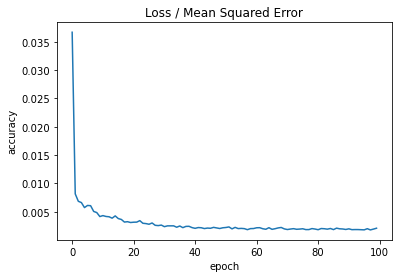

In [35]:

# plot loss during training
print(history.history.keys())
plt.title('Loss / Mean Squared Error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.show()

In [36]:
model.save('stock_close_predictor.h5')

In [37]:
#now we will use testing data for predicion purpose 30% data is tetsing data

In [38]:
data_testing.head()

,Close
2158,47.477501
2159,47.572498
2160,50.375000
2161,51.847500
2162,51.997501


In [39]:
#for predicting the values of testing data--> 2158th day 
# we need the mean of previous 100 days

data_training.tail(100) #100 previous data from 2158 index position

,Close
2058,43.757500
2059,44.235001
2060,44.994999
2061,45.430000
2062,44.992500
...,...
2153,47.902500
2154,48.250000
2155,48.705002
2156,48.552502


In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = past_100_days.append(data_testing,ignore_index = True) 
#last 100 days of data_testing and data_trainning are appended in final_df

In [42]:
final_df.head()  #this is the testing data

,Close
0,43.757500
1,44.235001
2,44.994999
3,45.430000
4,44.992500


In [43]:
# new again we need to scale the testing data, we need to apply MInMax
# Scaler because this data is not sacled down to 0-1

In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0560553 ],
       [0.05931553],
       [0.06450456],
       ...,
       [0.97917564],
       [0.97105068],
       [0.94947516]])

In [45]:
input_data.shape  #1 means for 1 coulumn i.e. closing price column

(1026, 1)

In [46]:
x_test = []
y_test = []

#gaain define the step size as 100
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])  #oth coulmn i.e. closing price column

In [47]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [48]:
x_test.shape

(926, 100, 1)

In [49]:
y_test.shape

(926,)

In [50]:
#making predictions
model = load_model('stock_close_predictor.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [51]:
y_predicted = model.predict(x_test)

In [52]:
y_predicted.shape

(926, 1)

In [53]:
y_test

array([0.0814543 , 0.08210292, 0.10123752, 0.11129129, 0.11231545,
       0.11415893, 0.11081335, 0.11105232, 0.11383461, 0.11153025,
       0.11381752, 0.11531962, 0.11615602, 0.12141334, 0.12868482,
       0.12506616, 0.12434923, 0.12436631, 0.12511736, 0.126261  ,
       0.12929931, 0.13230349, 0.13790219, 0.14140138, 0.14583939,
       0.14708543, 0.14454211, 0.13810704, 0.13503457, 0.12996501,
       0.13938723, 0.13464199, 0.14375694, 0.13937014, 0.1291969 ,
       0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872

In [54]:
y_predicted

array([[0.12079665],
       [0.12116972],
       [0.12146586],
       [0.12182233],
       [0.1224038 ],
       [0.12327638],
       [0.12444451],
       [0.12584278],
       [0.12739271],
       [0.12904473],
       [0.13072915],
       [0.13240552],
       [0.13405561],
       [0.13566796],
       [0.13727744],
       [0.13896391],
       [0.14071688],
       [0.14249429],
       [0.14425322],
       [0.14596313],
       [0.1476096 ],
       [0.14921011],
       [0.15079868],
       [0.15244225],
       [0.15419549],
       [0.15610743],
       [0.15818128],
       [0.16034791],
       [0.16246027],
       [0.16438255],
       [0.16598475],
       [0.16732569],
       [0.16841096],
       [0.16937333],
       [0.17024447],
       [0.17092459],
       [0.17137411],
       [0.17159781],
       [0.17166124],
       [0.17157531],
       [0.17142959],
       [0.17131239],
       [0.17123252],
       [0.17128068],
       [0.17150539],
       [0.17193756],
       [0.1726026 ],
       [0.173

In [55]:
#now for comparing y+predicted and y_test we need to again scale them up 
#for that we need to find the scaling facot by which we need to scale them up

In [56]:
scaler.scale_  #this is the scaleing factor, now we need to divide y_predicted and 
#y_test data by this factor..

array([0.00682769])

In [57]:

scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [58]:
y_predicted

array([[ 17.69217  ],
       [ 17.746809 ],
       [ 17.790184 ],
       [ 17.842392 ],
       [ 17.927557 ],
       [ 18.055357 ],
       [ 18.226444 ],
       [ 18.431238 ],
       [ 18.658245 ],
       [ 18.900202 ],
       [ 19.146908 ],
       [ 19.392433 ],
       [ 19.63411  ],
       [ 19.870258 ],
       [ 20.105986 ],
       [ 20.35299  ],
       [ 20.609734 ],
       [ 20.870058 ],
       [ 21.127676 ],
       [ 21.378113 ],
       [ 21.619259 ],
       [ 21.853674 ],
       [ 22.08634  ],
       [ 22.32706  ],
       [ 22.583843 ],
       [ 22.86387  ],
       [ 23.167612 ],
       [ 23.484941 ],
       [ 23.794323 ],
       [ 24.075865 ],
       [ 24.310528 ],
       [ 24.506926 ],
       [ 24.665876 ],
       [ 24.806828 ],
       [ 24.934416 ],
       [ 25.034029 ],
       [ 25.099867 ],
       [ 25.13263  ],
       [ 25.14192  ],
       [ 25.129333 ],
       [ 25.107992 ],
       [ 25.090828 ],
       [ 25.079128 ],
       [ 25.086184 ],
       [ 25.119095 ],
       [ 2

In [59]:
y_test

array([ 11.92999428,  12.02499164,  14.8274919 ,  16.29999101,
        16.44999246,  16.71999278,  16.22999135,  16.26499118,
        16.67249219,  16.33499084,  16.66998975,  16.88999086,
        17.01249217,  17.78249224,  18.84749033,  18.31749182,
        18.21248851,  18.21499095,  18.32499151,  18.49249097,
        18.93749044,  19.37748884,  20.19748812,  20.70998863,
        21.35998982,  21.54248866,  21.16998748,  20.2274907 ,
        19.77749017,  19.03499024,  20.41499061,  19.71999126,
        21.05498967,  20.41248817,  18.92249106,  19.01249116,
        19.04498855,  19.45998926,  18.86749078,  19.64998779,
        19.9999899 ,  19.55748906,  20.68998818,  20.88749022,
        21.26748728,  21.77248809,  22.46998987,  21.44998993,
        20.52498735,  20.39499016,  21.16998748,  18.54249018,
        18.0649895 ,  19.97998945,  18.79249005,  19.98998777,
        19.74999003,  18.45749114,  19.27998904,  19.61498796,
        20.13498815,  18.22498927,  19.40249036,  18.52

In [60]:
#now plotting them to get the analysis

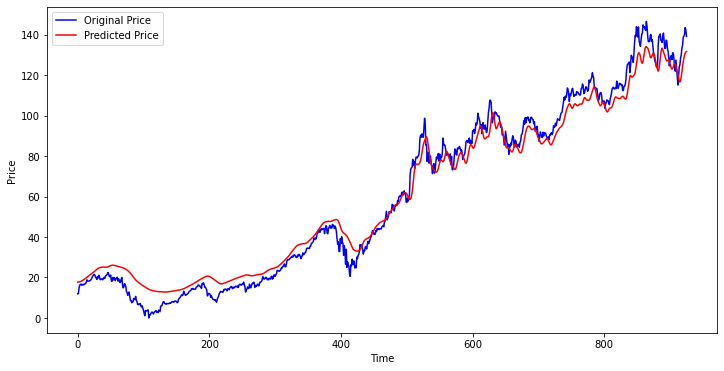

In [61]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


In [63]:
print(train_predict)

[[0.09647179]
 [0.09646887]
 [0.09643063]
 ...
 [0.91272223]
 [0.91580796]
 [0.91958964]]


In [64]:
print(test_predict)

[[0.12079665]
 [0.12116972]
 [0.12146586]
 [0.12182233]
 [0.1224038 ]
 [0.12327638]
 [0.12444451]
 [0.12584278]
 [0.12739271]
 [0.12904473]
 [0.13072915]
 [0.13240552]
 [0.13405561]
 [0.13566796]
 [0.13727744]
 [0.13896391]
 [0.14071688]
 [0.14249429]
 [0.14425322]
 [0.14596313]
 [0.1476096 ]
 [0.14921011]
 [0.15079868]
 [0.15244225]
 [0.15419549]
 [0.15610743]
 [0.15818128]
 [0.16034791]
 [0.16246027]
 [0.16438255]
 [0.16598475]
 [0.16732569]
 [0.16841096]
 [0.16937333]
 [0.17024447]
 [0.17092459]
 [0.17137411]
 [0.17159781]
 [0.17166124]
 [0.17157531]
 [0.17142959]
 [0.17131239]
 [0.17123252]
 [0.17128068]
 [0.17150539]
 [0.17193756]
 [0.1726026 ]
 [0.17353463]
 [0.17462447]
 [0.17569838]
 [0.17663428]
 [0.17743741]
 [0.1779483 ]
 [0.1780764 ]
 [0.17792863]
 [0.17752245]
 [0.17699724]
 [0.17643386]
 [0.17578863]
 [0.17511079]
 [0.17446846]
 [0.17394605]
 [0.17342919]
 [0.17294386]
 [0.17243688]
 [0.1718204 ]
 [0.17107898]
 [0.1703381 ]
 [0.16974822]
 [0.16912219]
 [0.16829851]
 [0.16

In [65]:
#Tenssform them back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
print(train_predict)

[[ 49.677  ]
 [ 49.67657]
 [ 49.67097]
 ...
 [169.22707]
 [169.67902]
 [170.23288]]


In [67]:
print(test_predict)

[[ 53.23968 ]
 [ 53.29432 ]
 [ 53.337692]
 [ 53.389904]
 [ 53.475067]
 [ 53.602867]
 [ 53.773956]
 [ 53.97875 ]
 [ 54.205753]
 [ 54.447712]
 [ 54.694416]
 [ 54.939945]
 [ 55.18162 ]
 [ 55.417767]
 [ 55.653496]
 [ 55.9005  ]
 [ 56.157246]
 [ 56.41757 ]
 [ 56.675186]
 [ 56.925625]
 [ 57.16677 ]
 [ 57.401184]
 [ 57.63385 ]
 [ 57.874573]
 [ 58.131355]
 [ 58.411385]
 [ 58.715126]
 [ 59.032455]
 [ 59.341835]
 [ 59.62338 ]
 [ 59.85804 ]
 [ 60.054436]
 [ 60.21339 ]
 [ 60.354343]
 [ 60.48193 ]
 [ 60.58154 ]
 [ 60.64738 ]
 [ 60.680145]
 [ 60.689434]
 [ 60.67685 ]
 [ 60.655502]
 [ 60.63834 ]
 [ 60.626644]
 [ 60.633698]
 [ 60.666607]
 [ 60.729904]
 [ 60.82731 ]
 [ 60.963818]
 [ 61.123436]
 [ 61.280724]
 [ 61.417797]
 [ 61.535423]
 [ 61.610252]
 [ 61.629013]
 [ 61.607372]
 [ 61.547882]
 [ 61.47096 ]
 [ 61.388443]
 [ 61.293938]
 [ 61.194664]
 [ 61.100586]
 [ 61.024075]
 [ 60.94837 ]
 [ 60.87729 ]
 [ 60.803032]
 [ 60.712746]
 [ 60.604156]
 [ 60.495644]
 [ 60.40925 ]
 [ 60.31756 ]
 [ 60.196922]
 [ 60.

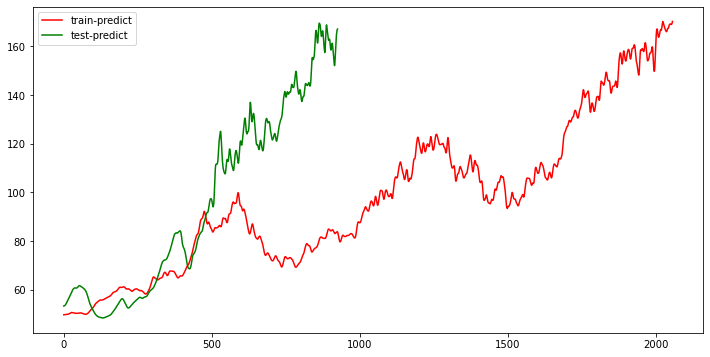

In [68]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(train_predict, 'r',label = 'train-predict')
plt.plot(test_predict, 'g',label = 'test-predict')
plt.legend()

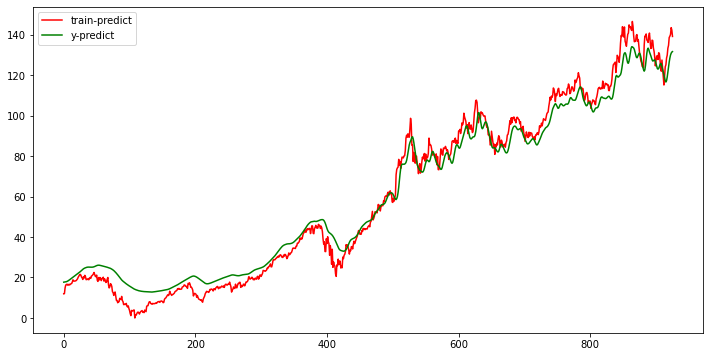

In [69]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r',label = 'train-predict')
plt.plot(y_predicted,'g',label = 'y-predict')
plt.legend()

In [70]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #it is the RMSE for training dataset

101.49380583877743

In [71]:
math.sqrt(mean_squared_error(y_test,test_predict)) #it is the RMSE for training dataset

36.383552448829995

In [72]:
# testPredict = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(score)
# Result (MSE adn RMSE)
TM_MSE = score
TM_RMSE = math.sqrt(score)

print('Mean squared error (MSE)', TM_MSE)
print('Root Mean squared error (RMSE)', TM_RMSE)



acc = score//100
print('Test accuracy: ',acc, '%')

29/29 [==============================] - 2s 49ms/step - loss: 5424.1006
5424.1005859375
Mean squared error (MSE) 5424.1005859375
Root Mean squared error (RMSE) 73.64849343969976
Test accuracy:  54.0 %
